In [3]:
import requests
import json
from Final_Authentication_keys import BLS_api_key

series_id = 'LNS14000000'  # Unemployment rate
start_year = 2018
end_year = 2023
api_key = BLS_api_key 

url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'

response = requests.get(url)

data = json.loads(response.text)

print(data)


{'status': 'REQUEST_SUCCEEDED', 'responseTime': 225, 'message': [], 'Results': {'series': [{'seriesID': 'LNS14000000', 'data': [{'year': '2023', 'period': 'M05', 'periodName': 'May', 'latest': 'true', 'value': '3.7', 'footnotes': [{}]}, {'year': '2023', 'period': 'M04', 'periodName': 'April', 'value': '3.4', 'footnotes': [{}]}, {'year': '2023', 'period': 'M03', 'periodName': 'March', 'value': '3.5', 'footnotes': [{}]}, {'year': '2023', 'period': 'M02', 'periodName': 'February', 'value': '3.6', 'footnotes': [{}]}, {'year': '2023', 'period': 'M01', 'periodName': 'January', 'value': '3.4', 'footnotes': [{}]}, {'year': '2022', 'period': 'M12', 'periodName': 'December', 'value': '3.5', 'footnotes': [{}]}, {'year': '2022', 'period': 'M11', 'periodName': 'November', 'value': '3.6', 'footnotes': [{}]}, {'year': '2022', 'period': 'M10', 'periodName': 'October', 'value': '3.7', 'footnotes': [{}]}, {'year': '2022', 'period': 'M09', 'periodName': 'September', 'value': '3.5', 'footnotes': [{}]}, {'

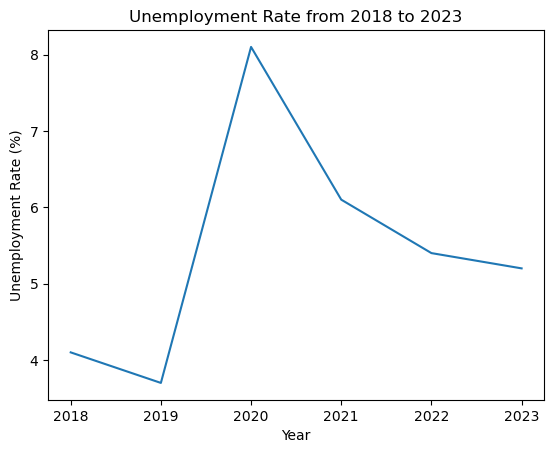

In [4]:
import matplotlib.pyplot as plt

years = [2018, 2019, 2020, 2021, 2022, 2023] 
unemployment_rates = [4.1, 3.7, 8.1, 6.1, 5.4, 5.2] 

plt.plot(years, unemployment_rates)

plt.title('Unemployment Rate from 2018 to 2023')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

plt.show()


In [ ]:
#use M12 to represent the whole year is not reasonable, so I decide to use avg of 12 months.

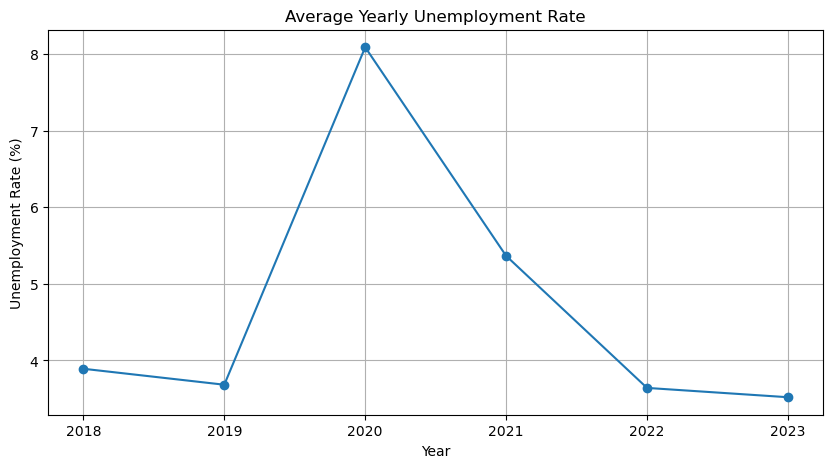

In [12]:
import requests
import json
import matplotlib.pyplot as plt
from Final_Authentication_keys import BLS_api_key

series_id = 'LNS14000000'  # Unemployment rate
start_year = 2018
end_year = 2023
api_key = BLS_api_key 

url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'

response = requests.get(url)

data = json.loads(response.text)

year_data = {}
for series in data['Results']['series']:
    for item in series['data']:
        if item['year'] not in year_data:
            year_data[item['year']] = []
        year_data[item['year']].append(float(item['value']))

average_year_data = {year: sum(values)/len(values) for year, values in year_data.items()}

years = sorted(list(average_year_data.keys()))
averages = [average_year_data[year] for year in years]

plt.figure(figsize=(10, 5))
plt.plot(years, averages, marker='o')
plt.title('Average Yearly Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [5]:
import requests
import json


series_id = 'LNS12000000'  # employment data
start_year = 2018
end_year = 2023
api_key = BLS_api_key 

url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'

response = requests.get(url)

data = json.loads(response.text)

print(data)


{'status': 'REQUEST_SUCCEEDED', 'responseTime': 198, 'message': [], 'Results': {'series': [{'seriesID': 'LNS12000000', 'data': [{'year': '2023', 'period': 'M05', 'periodName': 'May', 'latest': 'true', 'value': '160721', 'footnotes': [{}]}, {'year': '2023', 'period': 'M04', 'periodName': 'April', 'value': '161031', 'footnotes': [{}]}, {'year': '2023', 'period': 'M03', 'periodName': 'March', 'value': '160892', 'footnotes': [{}]}, {'year': '2023', 'period': 'M02', 'periodName': 'February', 'value': '160315', 'footnotes': [{}]}, {'year': '2023', 'period': 'M01', 'periodName': 'January', 'value': '160138', 'footnotes': [{'code': '1', 'text': 'Data affected by changes in population controls.'}]}, {'year': '2022', 'period': 'M12', 'periodName': 'December', 'value': '159244', 'footnotes': [{}]}, {'year': '2022', 'period': 'M11', 'periodName': 'November', 'value': '158527', 'footnotes': [{}]}, {'year': '2022', 'period': 'M10', 'periodName': 'October', 'value': '158593', 'footnotes': [{}]}, {'ye

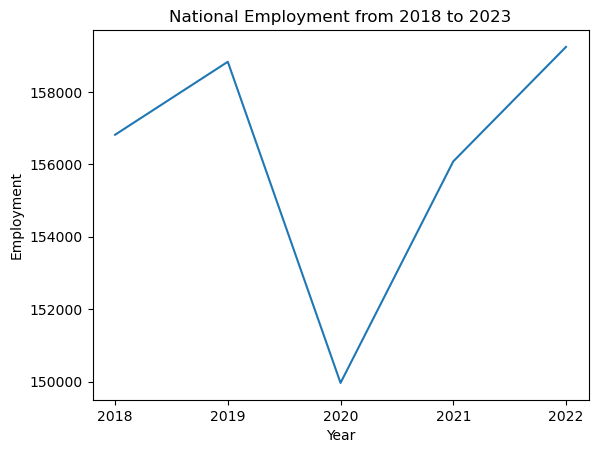

In [6]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from Final_Authentication_keys import BLS_api_key

series_id = 'LNS12000000'  # National employment, seasonally adjusted
start_year = 2018
end_year = 2023
api_key = BLS_api_key 

url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'

response = requests.get(url)

data = json.loads(response.text)

years = []
values = []

for series in data['Results']['series']:
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']

       
        if period == 'M12':
            years.append(int(year))
            values.append(float(value))


plt.plot(years, values)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('National Employment from 2018 to 2023')
plt.xlabel('Year')
plt.ylabel('Employment')

plt.show()


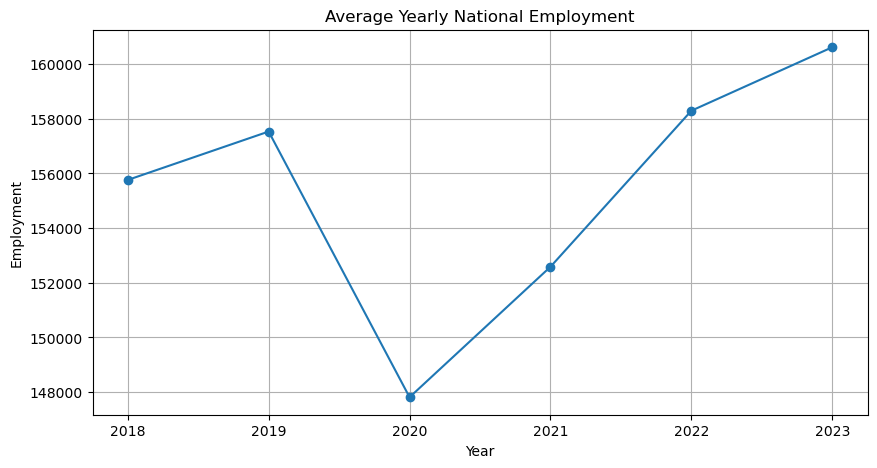

In [14]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from Final_Authentication_keys import BLS_api_key

series_id = 'LNS12000000'  # National employment, seasonally adjusted
start_year = 2018
end_year = 2023
api_key = BLS_api_key 

url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'

response = requests.get(url)

data = json.loads(response.text)

year_data = {}
for series in data['Results']['series']:
    for item in series['data']:
        if item['year'] not in year_data:
            year_data[item['year']] = []
        year_data[item['year']].append(float(item['value']))

average_year_data = {year: sum(values)/len(values) for year, values in year_data.items()}

years = sorted(list(average_year_data.keys()))
averages = [average_year_data[year] for year in years]

plt.figure(figsize=(10, 5))
plt.plot(years, averages, marker='o')
plt.title('Average Yearly National Employment')
plt.xlabel('Year')
plt.ylabel('Employment')
plt.grid(True)
plt.show()


In [15]:
import requests
import json
from Final_Authentication_keys import BLS_api_key

series_id_employment = 'LNS12000000'  # Total Employment
series_id_laborforce = 'LNS11000000'  # Labor Force
start_year = 2018
end_year = 2023
api_key = BLS_api_key

url_employment = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id_employment}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'
url_laborforce = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id_laborforce}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}'

response_employment = requests.get(url_employment)
response_laborforce = requests.get(url_laborforce)

data_employment = json.loads(response_employment.text)
data_laborforce = json.loads(response_laborforce.text)